<a href="https://colab.research.google.com/github/Eisawi7/date-mining-1/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


In [8]:
from google.colab import files
uploaded = files.upload()
mall_data = pd.read_csv('Mall_Customers.csv')

Saving Mall_Customers.csv to Mall_Customers.csv


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN



In [10]:
from google.colab import files
uploaded = files.upload()

mall_data = pd.read_csv('Mall_Customers.csv')

Saving Mall_Customers.csv to Mall_Customers (1).csv


In [31]:
from sklearn.cluster import DBSCAN
import numpy as np
X = np.array([[1, 2], [2, 2], [2, 3],
[8, 7], [8, 8], [25, 80]])
clustering = DBSCAN(eps=3, min_samples=2).fit(X)
# Call array using np.array to fix the error
print(np.array([0, 0, 0, 1, 1, -1]))
clustering
DBSCAN(eps=3,min_samples=2)

[ 0  0  0  1  1 -1]


DBSCAN(eps=3, min_samples=2)

In [32]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(
n_samples=750, centers=centers, cluster_std=0.4, random_state=0
)
X = StandardScaler().fit_transform(X)

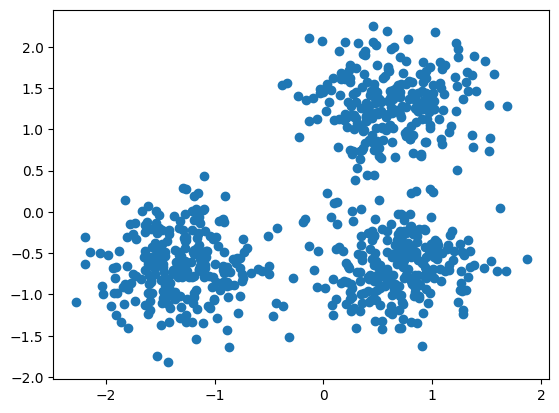

In [33]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [38]:
import numpy as np
from sklearn import metrics
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
labels = db.labels_
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise point: %d" % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))

Estimated number of clusters: 3
Estimated number of noise point: 18
Homogeneity: 0.953


In [60]:
import matplotlib.pyplot as plt
import numpy as np


In [11]:
print(mall_data.head())

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [12]:
print(mall_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [13]:
print(mall_data.describe())

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


In [14]:
print(mall_data.isnull().sum())

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [15]:
X = mall_data[['Annual Income (k$)', 'Spending Score (1-100)']]

In [16]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [17]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

In [18]:
mall_data['Cluster'] = labels

In [26]:
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

In [28]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

mall_data['Cluster'] = labels

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print("Estimated number of clusters:", n_clusters)
print("Estimated number of noise points:",n_noise)

Estimated number of clusters: 2
Estimated number of noise points: 8


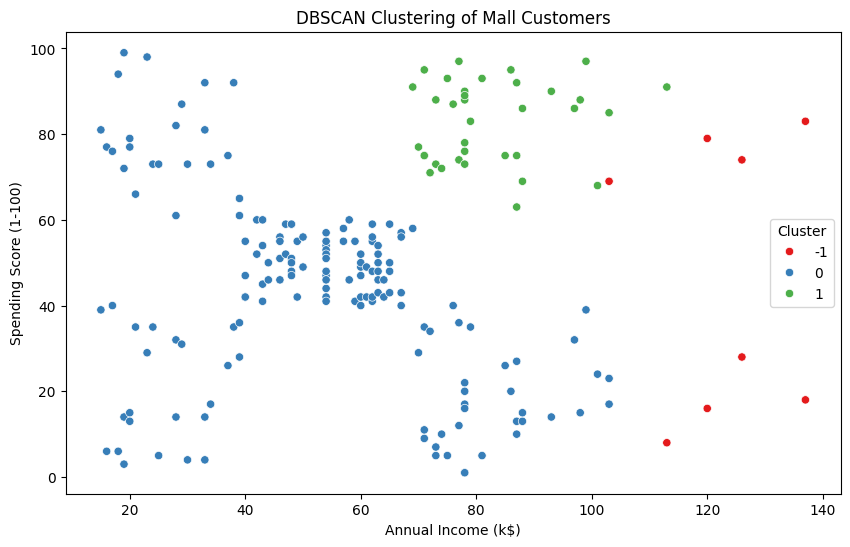

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=mall_data['Annual Income (k$)'],
    y=mall_data['Spending Score (1-100)'],
    hue=mall_data['Cluster'],
    palette='Set1'
)

plt.title('DBSCAN Clustering of Mall Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()